# Business Challenge: 

## Predicting the price of cars based on a wide range of attributes and features. We aim to develop a machine learning model that accurately estimates the price of different car models specs and understand the factors on which the pricing of cars depends on.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
# Replace 'yourfile.csv' with the path to your CSV file
raw_df = pd.read_csv('CarPrice_Assignment.csv')

# Display the first few rows of the DataFrame
raw_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Check for missing values in all columns
missing_values = raw_df.isnull().sum()

# Display the count of missing values per column
print(missing_values)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [5]:
# Check Duplication
raw_df.duplicated().sum()

0

In [6]:
#Check datatype
raw_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
#Check statistics of data set
raw_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Check the number of unique values of each column
raw_df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [9]:
# Initial data size
raw_df.shape

(205, 26)

In [10]:
df=raw_df

## Univariable Analysis - Numerical Variable

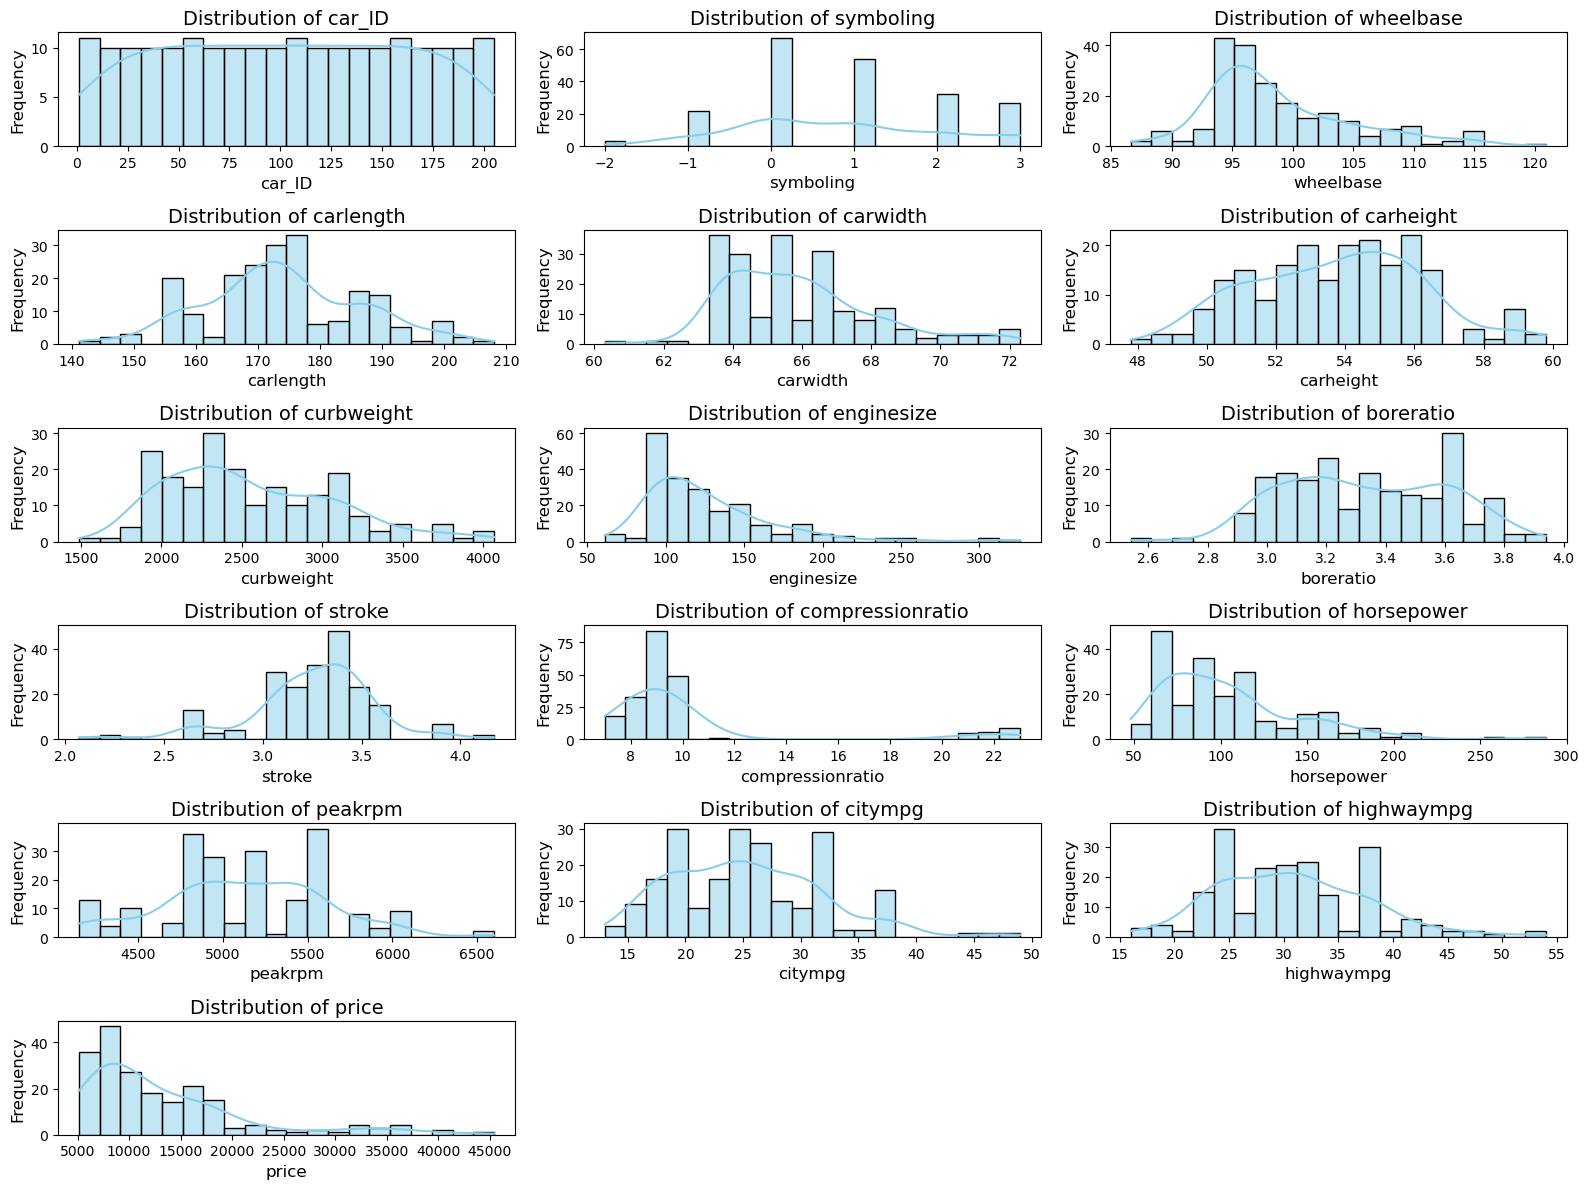

In [12]:
# Filter numerical variables from the dataframe
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure and axes for the subplots
plt.figure(figsize=(16, 12))  # Adjust size to fit all plots

# Iterate through the numerical variables to plot histograms with KDE
for i, var in enumerate(numerical_vars):
    plt.subplot((len(numerical_vars) // 3) + 1, 3, i+1)  # Create a grid with 3 plots per row
    
    # Plot histogram with a KDE overlay
    sns.histplot(df[var], kde=True, color='skyblue', bins=20, edgecolor='black')
    
    # Add titles and labels
    plt.title(f'Distribution of {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()

## Univariable Analysis - Categorical Variable

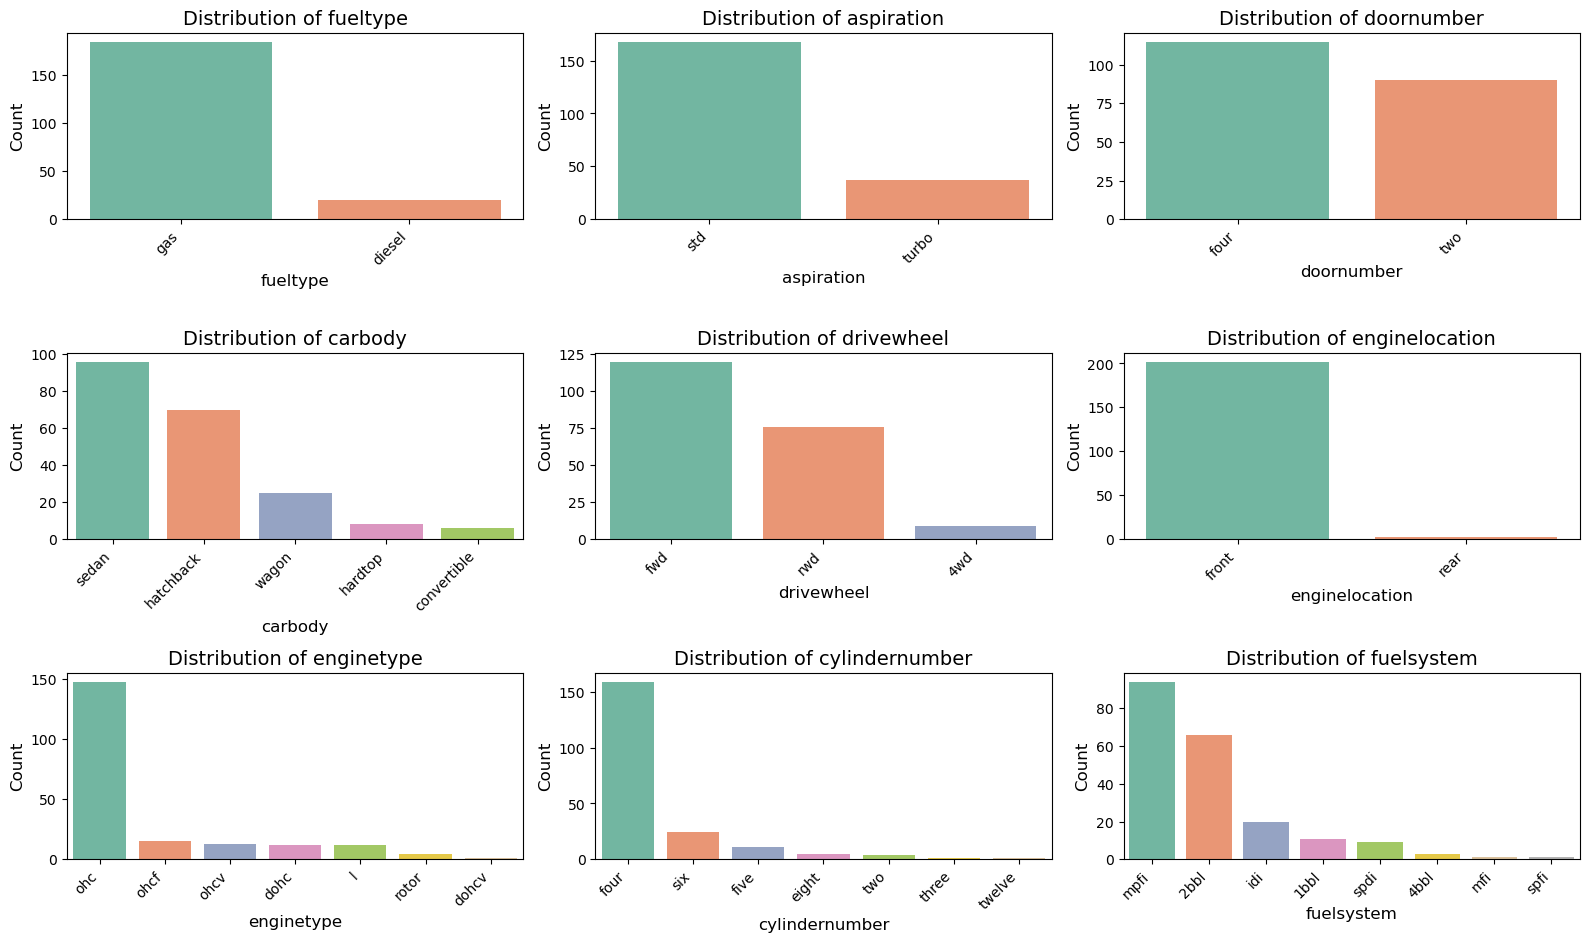

In [14]:
# Filter categorical variables from the dataframe
# List of categorical variables
categorical_vars = df.select_dtypes(include=['object']).columns.drop('CarName')

# Set up the figure and axes for the subplots
plt.figure(figsize=(16, 12))  # Adjust size to accommodate all plots

# Iterate through the categorical variables to plot bar plots
for i, var in enumerate(categorical_vars):
    plt.subplot((len(categorical_vars) // 3) + 1, 3, i + 1)  # Create a grid with 3 plots per row
    
    # Plot bar plot for each categorical variable
    sns.countplot(data=df, x=var, palette='Set2', order=df[var].value_counts().index)
    
    # Add titles and labels
    plt.title(f'Distribution of {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Rotate x-axis labels if necessary for readability
    plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

## Bivariate Analysis- Numerical X to Target Y

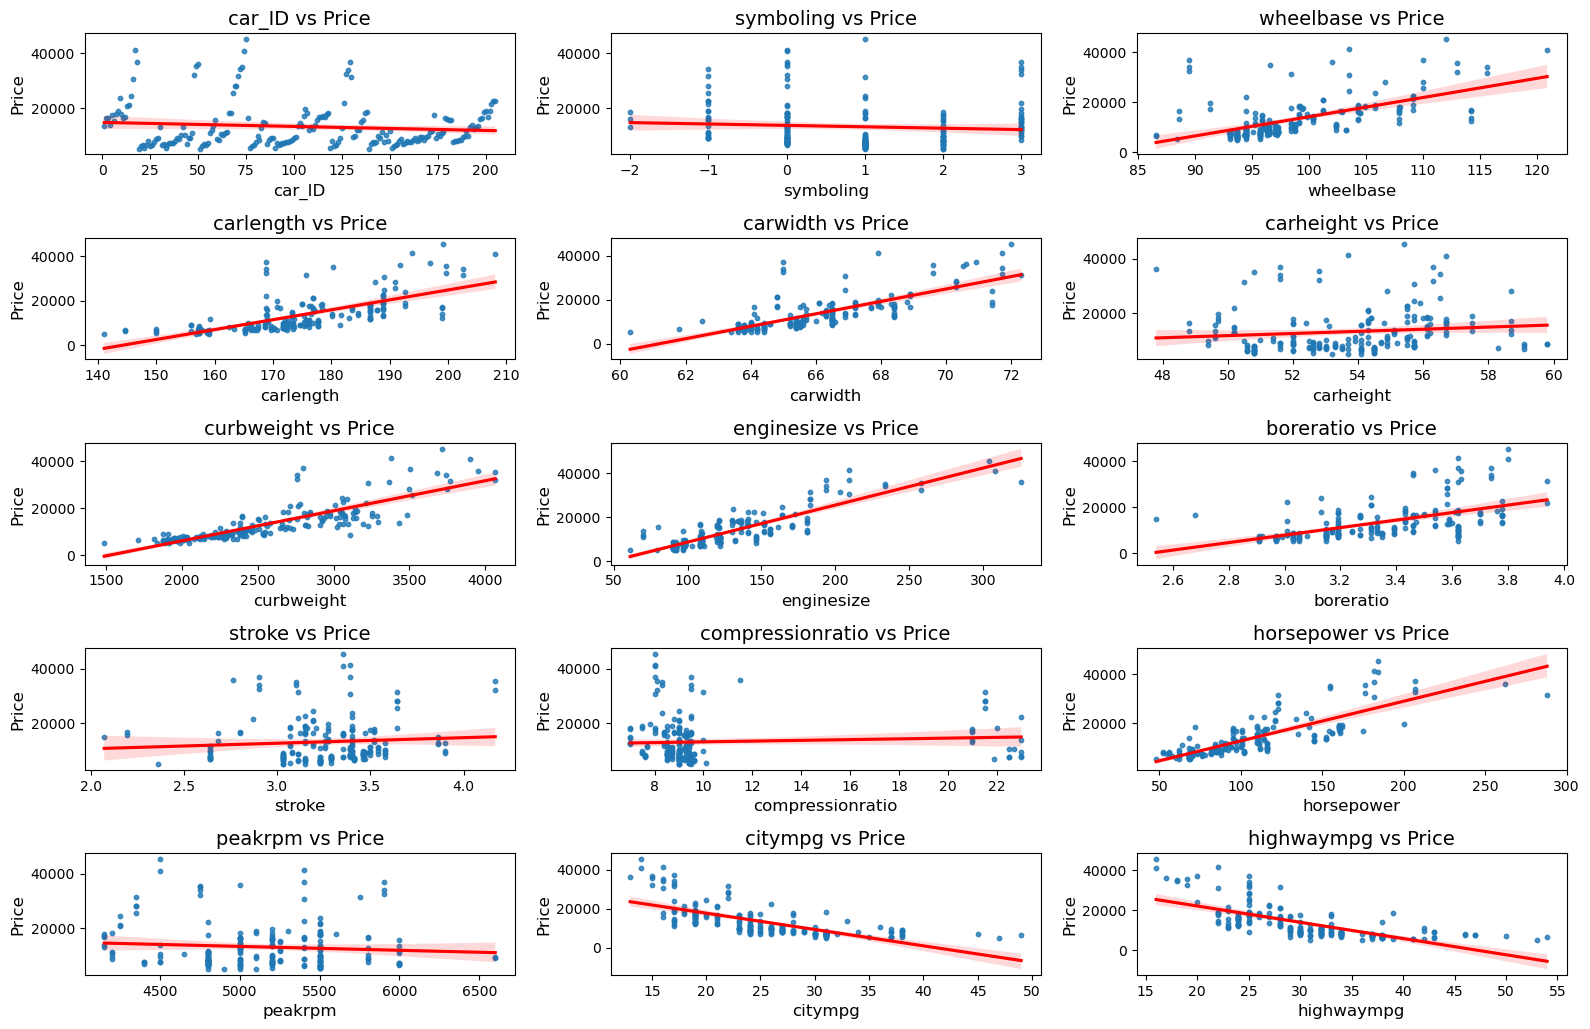

In [16]:
# List of numerical variables
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns.drop('price')

# Set up the figure and axes for the subplots
plt.figure(figsize=(16, 12))

# Scatter plots for each numerical variable vs price
for i, var in enumerate(numerical_vars):
    plt.subplot((len(numerical_vars) // 3) + 1, 3, i + 1)
    
    # Scatter plot with regression line
    sns.regplot(x=var, y='price', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    
    # Add titles and labels
    plt.title(f'{var} vs Price', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Price', fontsize=12)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

## Bivariate Analysis: Categorical X to Target Y

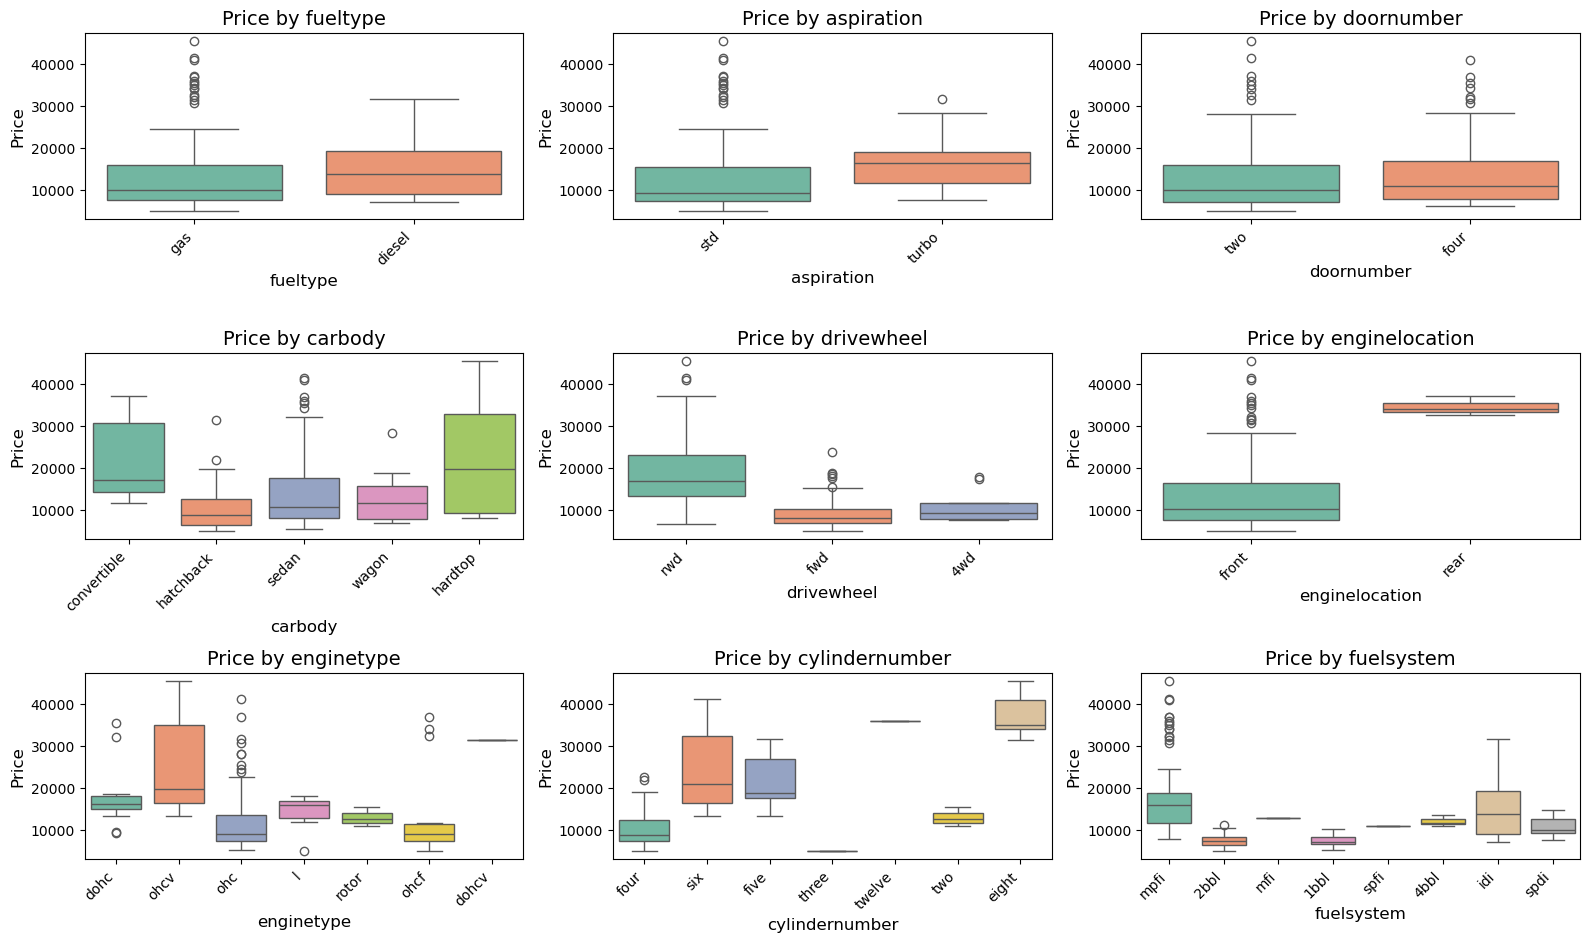

In [18]:

# Set up the figure and axes for the subplots
plt.figure(figsize=(16, 12))

# Box plots for each categorical variable vs price
for i, var in enumerate(categorical_vars):
    plt.subplot((len(categorical_vars) // 3) + 1, 3, i + 1)
    
    # Boxplot to visualize distribution of price across categories
    sns.boxplot(x=var, y='price', data=df, palette='Set2')
    
    # Add titles and labels
    plt.title(f'Price by {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

In [19]:
# Extract the car brand from the CarName column (assuming the brand is the first word)
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])

# Check unique brands
print(df['brand'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [20]:
# Summarize the price statistics (mean, median, count) by car brand
brand_summary = df.groupby('brand')['price'].agg(['mean', 'median', 'count']).reset_index()

# Display the summary
print("Summary of Price by Car Brand:")
print(brand_summary)

Summary of Price by Car Brand:
          brand          mean    median  count
0        Nissan   5499.000000   5499.00      1
1   alfa-romero  15498.333333  16500.00      3
2          audi  17859.166714  17710.00      7
3           bmw  26118.750000  22835.00      8
4         buick  33647.000000  32892.00      8
5     chevrolet   6007.000000   6295.00      3
6         dodge   7875.444444   7609.00      9
7         honda   8184.692308   7295.00     13
8         isuzu   8916.500000   8916.50      4
9        jaguar  34600.000000  35550.00      3
10        maxda   5645.000000   5645.00      2
11        mazda  11320.600000  10795.00     15
12      mercury  16503.000000  16503.00      1
13   mitsubishi   9239.769231   8499.00     13
14       nissan  10704.882353   8249.00     17
15      peugeot  15489.090909  16630.00     11
16     plymouth   7963.428571   7609.00      7
17     porcshce  32528.000000  32528.00      1
18      porsche  31118.625000  32714.25      4
19      renault   9595.000000

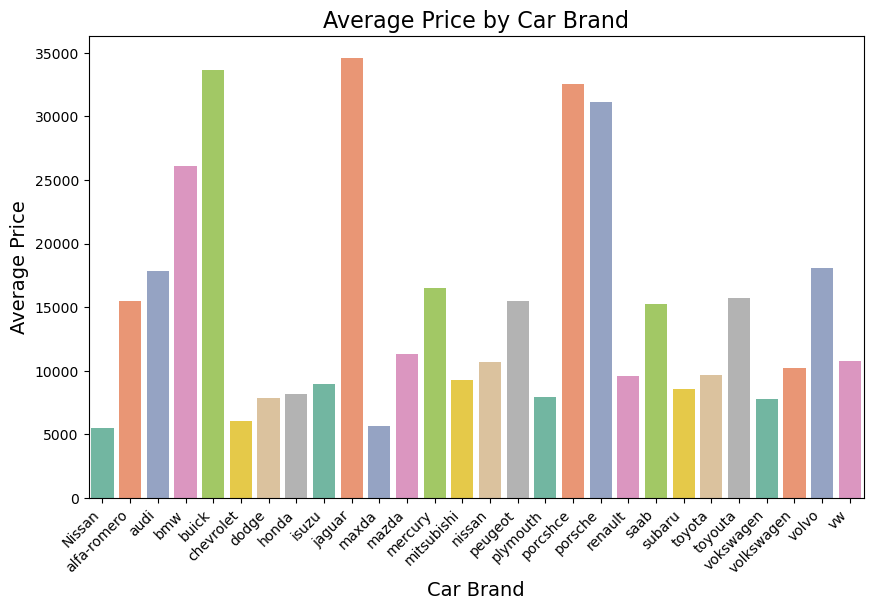

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='mean', data=brand_summary, palette='Set2')
plt.title('Average Price by Car Brand', fontsize=16)
plt.xlabel('Car Brand', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

## Multivariate Analysis

<Figure size 1200x800 with 0 Axes>

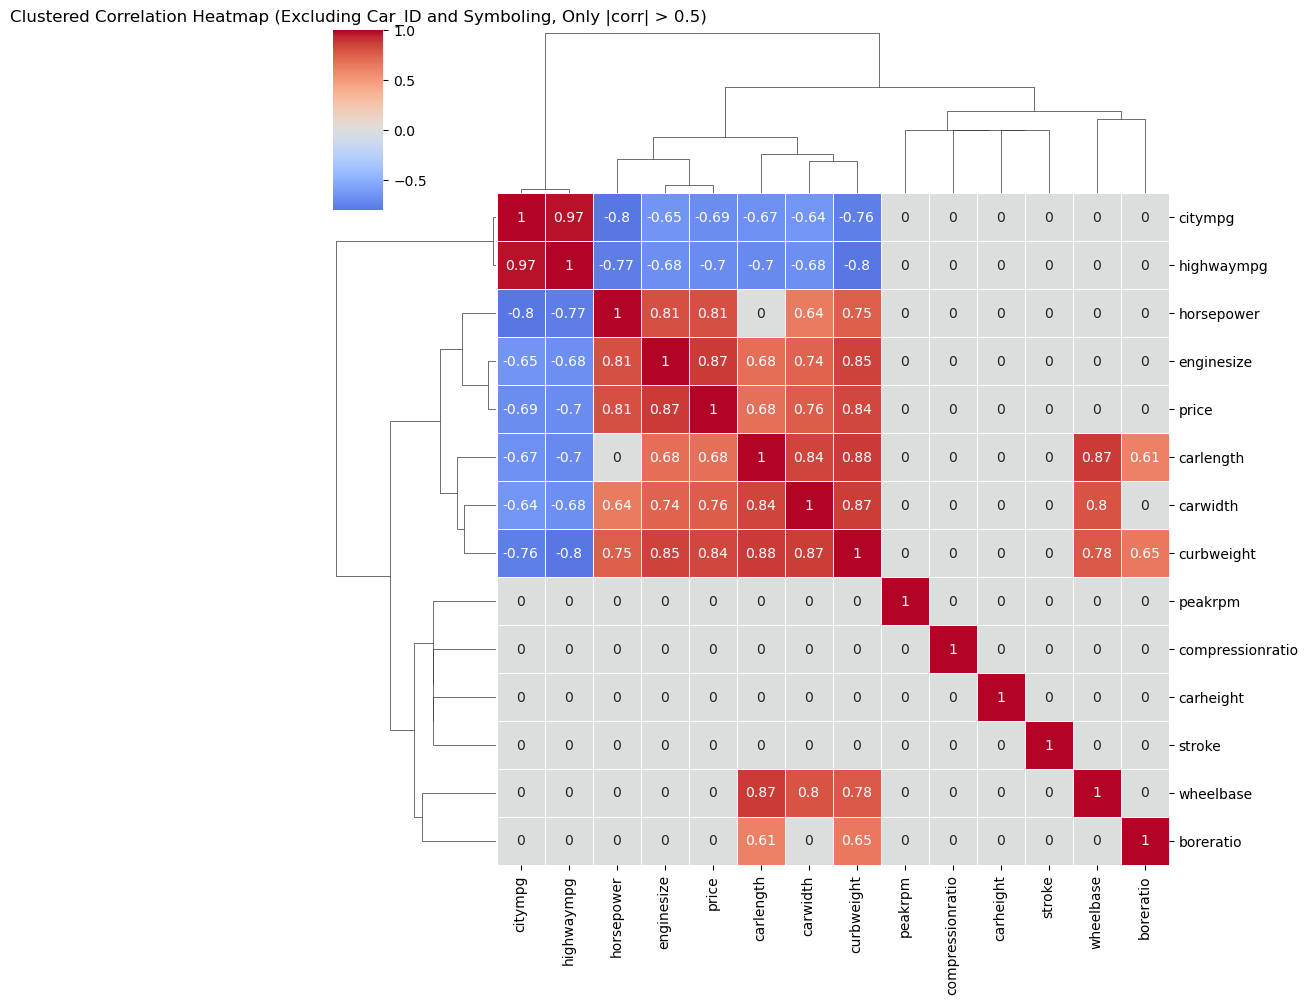

In [23]:
# Exclude 'car_ID' and 'symboling' columns
df_filtered = df.drop(columns=['car_ID', 'symboling'])

# Select only numerical columns for the correlation matrix
numerical_df = df_filtered.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create a mask to highlight only correlations with an absolute value greater than 0.5
mask = np.abs(corr_matrix) < 0.6

# Apply the mask to the correlation matrix (set masked values to NaN)
filtered_corr_matrix = corr_matrix.mask(mask)

# Drop rows and columns that contain only NaN values after masking
filtered_corr_matrix = filtered_corr_matrix.dropna(how='all').dropna(axis=1, how='all')

# Ensure that the correlation matrix contains only finite values
filtered_corr_matrix = filtered_corr_matrix.fillna(0)  # Replace NaNs with 0 for clustering

# Plot the heatmap with hierarchical clustering
plt.figure(figsize=(12, 8))
sns.clustermap(filtered_corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, center=0, method='average')
plt.title('Clustered Correlation Heatmap (Excluding Car_ID and Symboling, Only |corr| > 0.5)')
plt.show()

In [24]:
corr_matrix

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


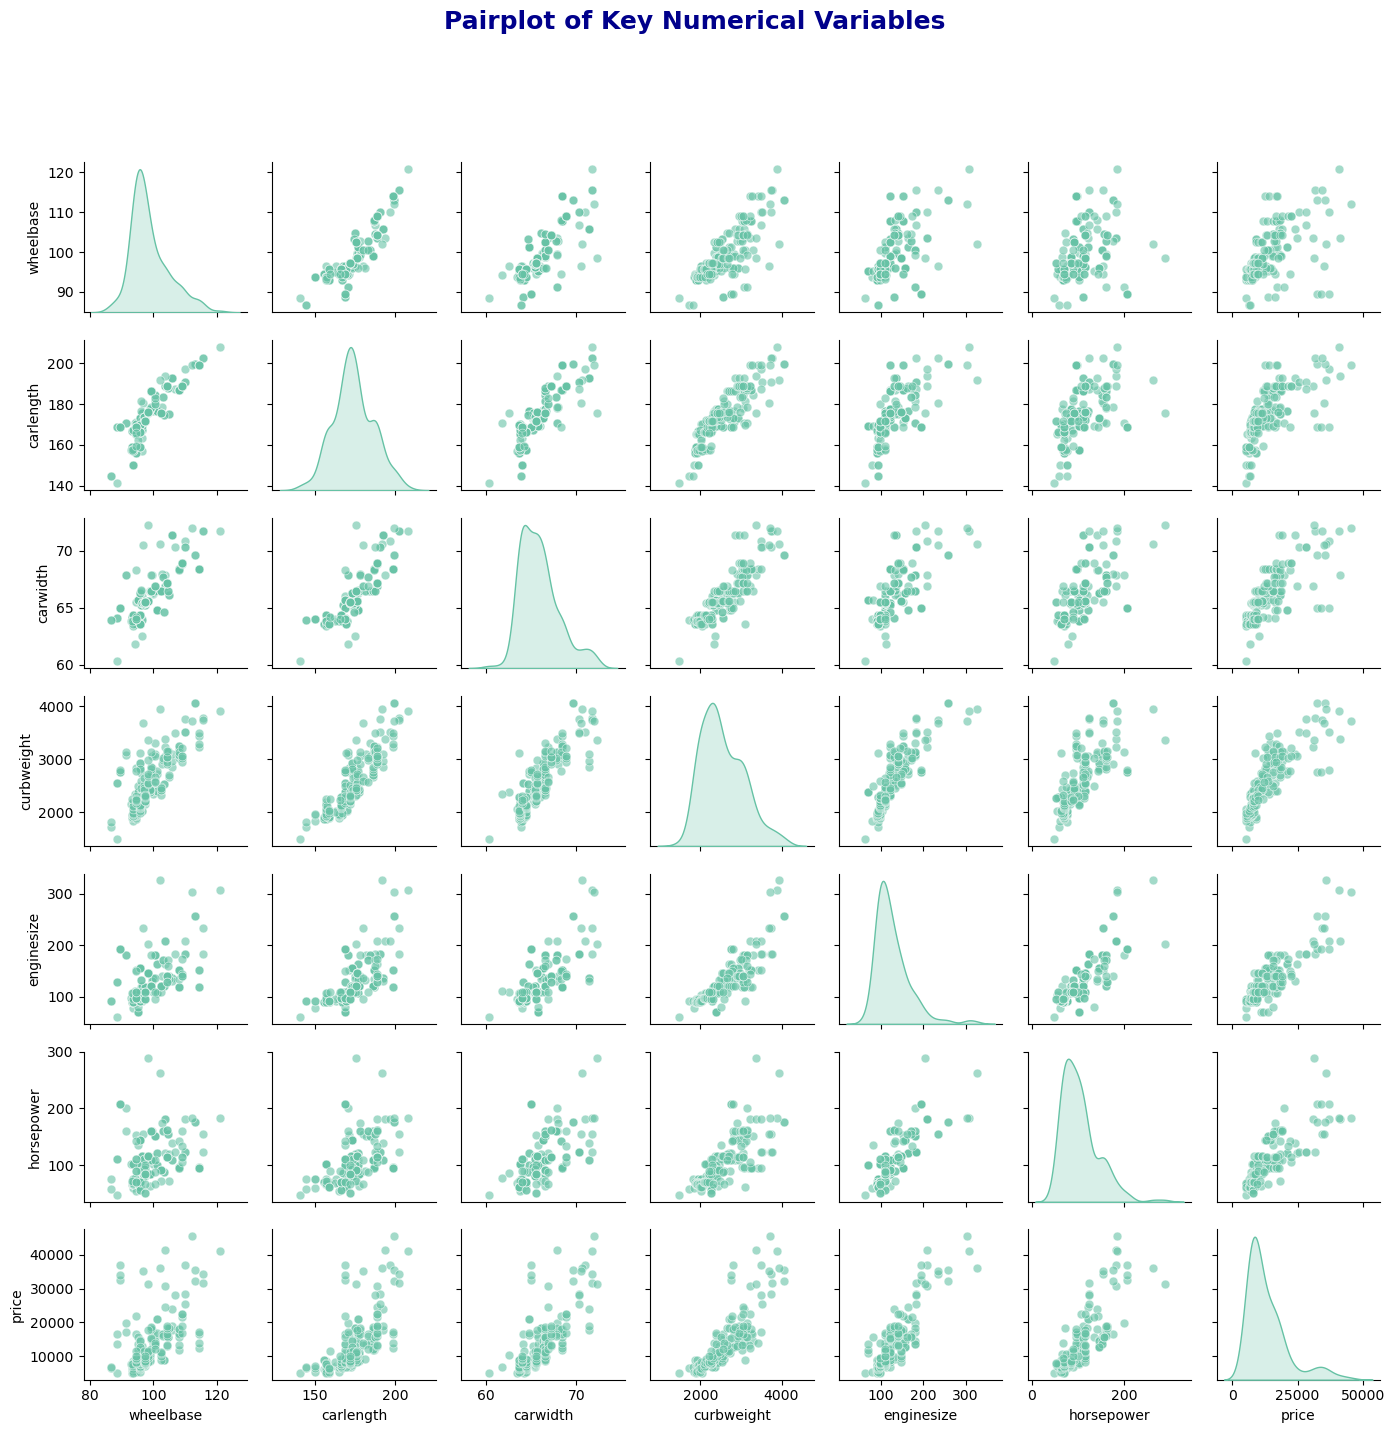

In [25]:
# Set a custom color palette
sns.set_palette("Set2")

# Create the pairplot with smaller size
g = sns.pairplot(df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'price']],
                 height=2, plot_kws={'alpha':0.6, 's':40}, diag_kind='kde')

# Adjust the title to make it more prominent
plt.suptitle('Pairplot of Key Numerical Variables', 
             y=1.02, fontsize=18, fontweight='bold', color='darkblue')

# Adjust the layout so everything fits nicely
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save as a high-resolution image (optional for portfolio)
plt.savefig("pairplot.png", dpi=300)

# Show the plot
plt.show()

### Key Insights from Correlation Matrix

#### Strong Positive Correlations with `price`:
- **`enginesize` (0.87)**: Larger engines are strongly associated with higher prices.
- **`horsepower` (0.81)**: More powerful vehicles tend to be more expensive.
- **`curbweight` (0.84)**: Heavier cars are generally pricier, possibly indicating larger or more luxurious vehicles.
- **`carwidth` (0.76)** and **`carlength` (0.68)**: Larger vehicle dimensions are linked to higher prices.

#### Strong Negative Correlations with `price`:
- **`citympg` (-0.69)** and **`highwaympg` (-0.70)**: More expensive cars often have lower fuel efficiency, especially in city and highway driving.

#### Weak Correlations with `price`:
- **`carheight` (0.12)**: The height of the car does not significantly impact the price.
- **`peakrpm` (-0.09)**: A weak negative relationship, suggesting minimal influence on price.

### Overall Summary
- Engine size, horsepower, curb weight, and vehicle dimensions are key factors driving up vehicle prices.
- Fuel efficiency is negatively correlated with price, indicating that higher-end cars tend to sacrifice fuel economy for performance.

## Data Transformation and Processing (Encoding, Scaling, log-transformation, Feature Engineering)

In [28]:
# Extract brand and model from CarName
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# One-hot encode categorical variables (suggested instead of label encoding)
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Feature engineering
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']

# Apply squaring selectively (optional)
df['horsepower_squared'] = df['horsepower'] ** 2

# Apply log transformation to enginesize
df['log_enginesize'] = np.log(df['enginesize'] + 1)

# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [29]:
df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,model_x3,model_x4,model_x5,model_xf,model_xj,model_xk,model_z4,power_to_weight_ratio,horsepower_squared,log_enginesize
0,1,3,alfa-romero giulia,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,...,False,False,False,False,False,False,False,0.043564,12321,4.875197
1,2,3,alfa-romero stelvio,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,...,False,False,False,False,False,False,False,0.043564,12321,4.875197
2,3,1,alfa-romero Quadrifoglio,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,...,False,False,False,False,False,False,False,0.054552,23716,5.030438
3,4,2,audi 100 ls,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,...,False,False,False,False,False,False,False,0.043646,10404,4.700480
4,5,2,audi 100ls,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,...,False,False,False,False,False,False,False,0.040722,13225,4.919981


## Build Model (compare Linear Regression with XGBoost)

In [31]:
# Splitting the dataset
X = df.drop(['price', 'CarName'], axis=1)  # Drop target and CarName
y = df['price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression 

In [33]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 3410.903372124433
Mean Squared Error (MSE): 29801307.554601412
Root Mean Squared Error (RMSE): 5459.05738700386
R-squared (R2): 0.6225007641803482


### XGBoost

In [35]:
# Define the XGBoost regressor model
xgb_model = xgb.XGBRegressor(
    objective ='reg:squarederror', # Use squared error for regression
    n_estimators=100,              # Number of boosting rounds
    learning_rate=0.1,             # Step size shrinkage
    max_depth=5,                   # Maximum depth of the trees
    subsample=0.8,                 # Subsample ratio of the training instance
    colsample_bytree=0.8,          # Subsample ratio of columns
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model with MAE, MSE, RMSE, and R2
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1549.3082958269817
Mean Squared Error (MSE): 4957114.568448869
Root Mean Squared Error (RMSE): 2226.4578523854584
R-squared (R2): 0.9372072195815121


### Comparison: Linear Regression vs. XGBoost

| Metric                           | Linear Regression       | XGBoost                |
|----------------------------------|-------------------------|------------------------|
| **Mean Absolute Error (MAE)**     | 3,411                   | 1,549                  |
| **Mean Squared Error (MSE)**      | 29,801,308              | 4,957,115              |
| **Root Mean Squared Error (RMSE)**| 5,459                   | 2,226                  |
| **R-squared (R²)**                | 0.622                   | 0.937                  |


### Interpretation:

1. **Mean Absolute Error (MAE)**:
   - **Linear Regression**: 3,411
   - **XGBoost**: 1,549
   - **XGBoost** has a significantly lower MAE compared to Linear Regression, meaning it makes more accurate predictions on average. The average error is reduced by more than half with XGBoost.

2. **Mean Squared Error (MSE)**:
   - **Linear Regression**: 29,801,308
   - **XGBoost**: 4,957,115
   - The MSE for XGBoost is much lower, indicating it penalizes large errors far less than Linear Regression does. This shows that XGBoost significantly reduces overall error compared to Linear Regression.

3. **Root Mean Squared Error (RMSE)**:
   - **Linear Regression**: 5,459
   - **XGBoost**: 2,226
   - RMSE shows the average prediction error in the same units as the target variable (`price`). XGBoost is more accurate, reducing typical error by more than half.

4. **R-squared (R²)**:
   - **Linear Regression**: 0.622
   - **XGBoost**: 0.937
   - XGBoost explains **93.7%** of the variance in car prices, compared to **62.2%** for Linear Regression. XGBoost captures much more of the variability in the data, making it a much better fit.

### Conclusion:
- **XGBoost** significantly outperforms Linear Regression across all key metrics, providing better predictions, lower error rates, and explaining more variance in car prices.

In [73]:
price_statistics = df['price'].describe()
print(price_statistics)

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


### Evaluation of RMSE and MAE Relative to Price Statistics:

1. **RMSE (2,226) and MAE (1,549)** relative to the price distribution:
   - **Mean Price**: $13,276.71
   - **Median Price**: $10,295
   - The **RMSE of 2,226** indicates that, on average, the model’s predictions are off by $2,226. Given that the mean price is $13,276.71, this error represents **about 16.8%** of the average price. For the **median price of $10,295**, the RMSE is about **21.6%** of the median price.
   
   - The **MAE of 1,549** represents the average absolute error. This is about **11.7%** of the mean price, and **15%** of the median price. This is a reasonable level of error, suggesting the model performs well but still has room for improvement in terms of precision.

2. **Range of Prices**:
   - The prices range from **$5,118** to **$45,400**, so the RMSE of $2,226 is **relatively small** in comparison to the full range of prices. This means that even though the model may not predict exact values perfectly, its errors are relatively moderate given the overall range of car prices in the dataset.

3. **Variance Explained (R²)**:
   - With an **R² of 0.937**, the model explains **93.7%** of the variance in the price data. This high R² suggests that while the errors may seem noticeable, the model captures most of the underlying patterns in the data, making it highly effective in predicting prices.

### Conclusion:

- **MAE** and **RMSE** are **reasonable** relative to the price distribution. While there is some error, the model's predictions are within a range that is acceptable for many regression tasks, especially given the complexity of predicting car prices.
- The **RMSE** of 2,226 is not excessively high considering the mean and median prices. It suggests that the model is fairly accurate, especially given the wide range of prices in the dataset.
- **MAE** being lower than RMSE indicates that smaller errors are more common, but the model still makes some larger errors (which RMSE penalizes more).

Overall, the model’s performance is solid, particularly given the high R² value and the relatively low error metrics when compared to the price distribution. However, further optimization or feature engineering might reduce the error further if needed.

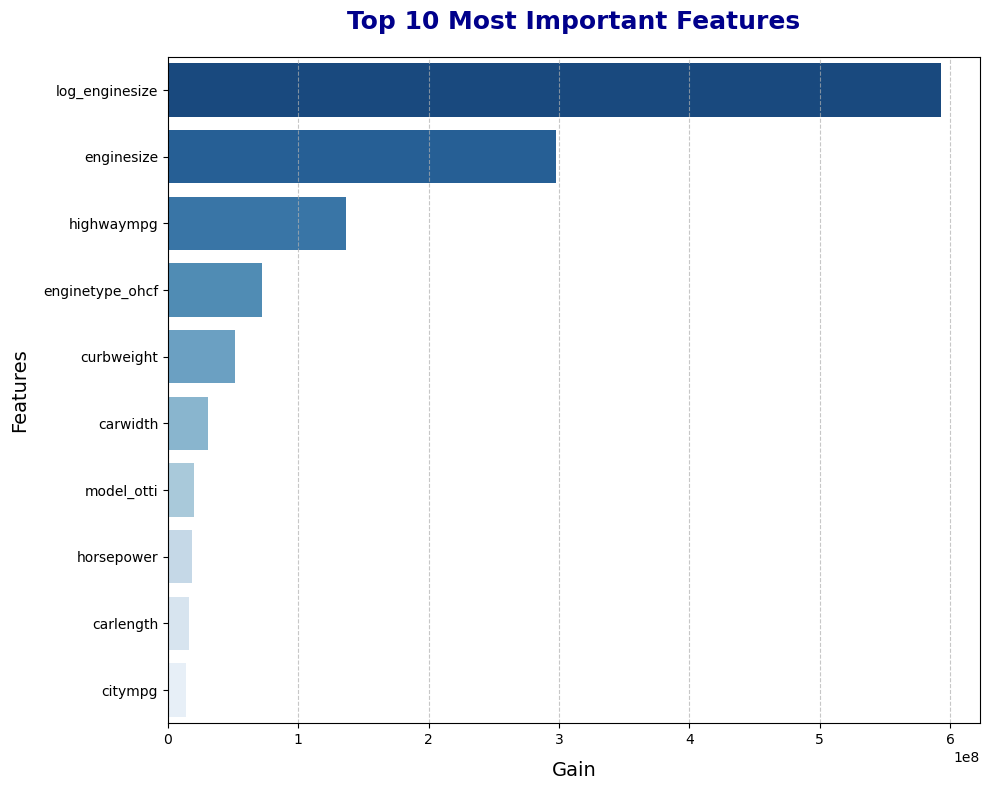

In [40]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Set the figure size and DPI for better quality
plt.figure(figsize=(10, 8), dpi=100)

# Retrieve feature importance as a dictionary
importance = xgb_model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Use a custom color palette from seaborn
colors = sns.color_palette('Blues_r', n_colors=10)

# Plot the feature importance as a horizontal bar chart
sns.barplot(x='Importance', y='Feature', data=importance_df, palette=colors)

# Customize the title and labels
plt.title('Top 10 Most Important Features', fontsize=18, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Gain', fontsize=14, labelpad=10)
plt.ylabel('Features', fontsize=14, labelpad=10)

# Add gridlines for clarity
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to ensure nothing overlaps
plt.tight_layout()

# Optionally save the plot to a high-resolution file for your portfolio
plt.savefig('feature_importance_pretty.png', dpi=300)

# Show the plot
plt.show()